# Benchmark over large Overture map dataset

In [1]:
!which python

/gpfs/data1/oshangp/easier/geohash-cid/py39/bin/python


In [2]:
import pygeohash as pgh
##load geojson
import geopandas as gpd
import pandas as pd
import os
import sys
sys.path.append("../")
from geohashtree.geohashtree import LiteTreeOffset, LiteTreeCID, FullTreeFile
from geohashtree.config import ipfs_binary
from geohashtree.filesystem import ipfs_add_feature,ipfs_add_index_folder


Can only import/use native python functions.
which: no ipfs in (/gpfs/data1/oshangp/easier/geohash-cid/py39/bin:/opt/TurboVNC/bin:/opt/TurboVNC/bin:/home/liuz/.vscode-server/bin/0ee08df0cf4527e40edc9aa28f4b5bd38bbff2b2/bin/remote-cli:/opt/TurboVNC/bin:/gpfs/data1/oshangp/easier/geohash-cid/py39/bin:/apps/python/3.7/anaconda/condabin:/opt/TurboVNC/bin:/usr/local/bin:/usr/bin:/opt/puppetlabs/bin:/usr/local/sbin:/usr/sbin:/home/liuz/.local/bin:/home/liuz/bin:/gpfs/data1/oshangp/easier/tools/gopath/bin:/home/liuz/.local/bin:/home/liuz/bin)


IPFS path: /gpfs/data1/oshangp/easier/textile/kubo/ipfs


## Truncated data

In [4]:
parquet = f"../data/overture/us_places.parquet"
gdf = gpd.read_parquet(parquet)

In [11]:
gdf_1m = gdf.sample(100000,random_state = 42)

In [12]:
gdf_1m.to_file("../data/overture/us_places_100k.geojson",driver="GeoJSON")

In [3]:
gdf = gpd.read_file("../data/overture/us_places_100k.geojson")

In [4]:
gdf.head()

,id,names_value,geometry
0,492842344421486,Salsarita's Fresh Cantina,POINT (-81.97373 35.03867)
1,192827194112640,Carlos Rivera - State Farm Agent,POINT (-112.27884 33.65047)
2,1595253450738770,Letners Demolition & Removal,POINT (-83.91401 36.14707)
3,1611377562455571,Ekg Ministries,POINT (-90.86513 29.79983)
4,123547258395314,Malley's Chocolates,POINT (-81.41941 40.86085)


In [5]:
# #add new columns
# import string
# import random
# import numpy as np
# # Add 5 columns of random text, each 64 characters long
# for i in range(10):
#     gdf[f'text_{i+1}'] = [''.join(random.choices(string.ascii_letters, k=64)) for _ in range(len(gdf))]

# # Add 5 columns of random floats between 0 and 1
# for i in range(20):
#     gdf[f'float_{i+1}'] = np.random.uniform(0, 1, len(gdf))

# gdf.to_file("../data/overture/us_places_100k_extra_cols.geojson",driver="GeoJSON")

## Start here

In [3]:
asset = "us_places_gh_sorted"
# asset = "us_places"
geojson_path = f"../data/overture/{asset}.geojson"
index_path = f"../data/geohash_offset_{asset}/index"

In [36]:
asset = "osm_us_poi_gh_sorted"
geojson_path = f"../data/osm/{asset}.geojson"
index_path = f"../data/geohash_offset_{asset}/index"

In [ ]:
index_path = f"../data/geohash_attach_{asset}/index"
fulltree = FullTreeFile()
fulltree.add_from_geojson(geojson_path)
fulltree.generate_tree_index(index_path)
ipfs_add_index_folder(index_path)

In [5]:
offsettree = LiteTreeOffset()
offsettree.add_from_geojson(geojson_path,precision=5)
offsettree.generate_tree_index(index_path)

Index Mode: offline


bafybeigljhzixbfo3gxdlkvjztwk5cwuysf7g5fm2yltd7aiolkmb6vafe


In [6]:
ipfs_add_index_folder(index_path)

'bafybeiez5bwfmxmm2s36sx2rlzeasraxvao2h4swbrp4bft75d62ejv4su'

In [6]:
ipfs_add_feature(geojson_path)

'bafybeigljhzixbfo3gxdlkvjztwk5cwuysf7g5fm2yltd7aiolkmb6vafe'

## sort the geohashes

In [3]:
from geohashtree.geohashtree import append_geohash_to_dataframe,append_h3_to_dataframe


In [4]:
parquet = f"../data/overture/us_places.parquet"
parquet = "../data/overture/us_buildings.parquet"
gdf = gpd.read_parquet(parquet)


<Axes: >

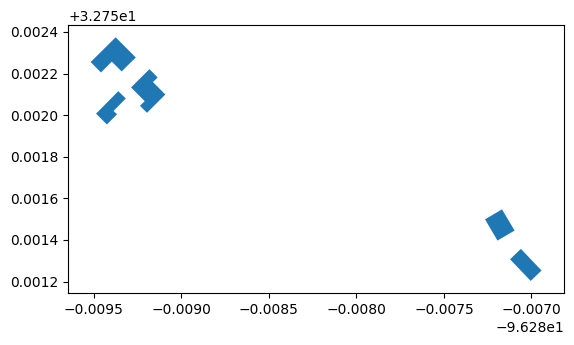

In [7]:
gdf.head().plot()

In [4]:
cols = gdf.columns

In [5]:
cols

Index(['id', 'names_value', 'main_cat', 'geometry'], dtype='object')

In [6]:
gdf = append_geohash_to_dataframe(gdf)


KeyboardInterrupt



In [ ]:
gdf

In [9]:
gdf = append_h3_to_dataframe(gdf,precision=5)
gdf.sort_values('geohash')[cols].to_file(f"../data/overture/us_places_h3_sorted.geojson",driver="GeoJSON")

In [11]:
gdf = gdf.sort_values('geohash')[cols]

In [12]:
gdf = gpd.read_file('../data/overture/us_places_h3_sorted.geojson')
cols = gdf.columns

In [30]:
#gdf = gdf[gdf.osm_type == 'node']

In [14]:
gdf = append_geohash_to_dataframe(gdf)

KeyboardInterrupt: 

In [12]:
out = gdf.sort_values('geohash')[cols]

In [13]:
gdf.shape

(13867406, 7)

In [14]:
out.shape

(13867406, 4)

In [16]:
gdf.head()

,id,names_value,main_cat,geometry,x,y,geohash
0,49679874639,Back Alley Bakery,bakery,POINT (-98.38904 40.58494),-98.389041,40.584940,9z4n
1,104889374747817,Smitty's MHP,campground,POINT (-98.38082 40.57477),-98.380820,40.574768,9z4n
2,115690661823498,Hoskins Auto Sales,car_dealer,POINT (-98.39011 40.56764),-98.390113,40.567644,9z4n
3,562949964809758,Edward Jones - Financial Advisor: Phil Nelson,None,POINT (-98.38725 40.58950),-98.387245,40.589498,9z4n
4,133754580009931,South Central Behavioral Services,counseling_and_mental_health,POINT (-98.39292 40.57619),-98.392920,40.576190,9z4n


In [17]:
gdf.sort_values('geohash')[cols]\
.to_file(f"../data/overture/{asset}_gh_sorted.geojson",driver="GeoJSON")

<Axes: >

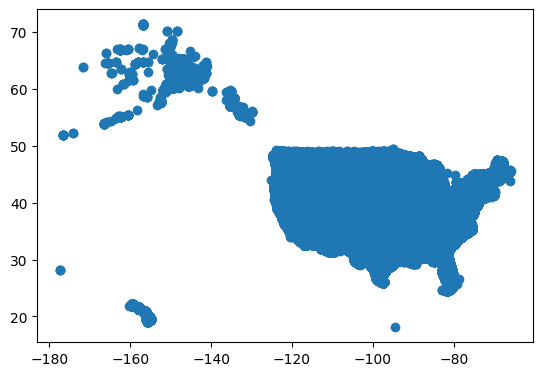

In [41]:
out.plot()